In [52]:
from google.colab import drive
drive.mount('/gdrive')
root = '/gdrive/My Drive/Colab Notebooks/data/MNIST/MNIST'

Mounted at /gdrive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

The following training and test data is for the **Unrotated** MNIST dataset.

In [14]:
x = loadmat(os.path.join(root, 'mnist_training_data' ))['training_data']
y = loadmat(os.path.join(root, 'mnist_training_label'))['training_label']

X_test = loadmat(os.path.join(root, 'mnist_test_data'))['test_data']
y_test = loadmat(os.path.join(root, 'mnist_test_label'))['test_label']

In [18]:
y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

The observations are ordered with respect to their labels. Hence we will shuffle them so that there is no apparent order.

In [20]:
shuffled_indices=np.random.permutation(len(x))
x=x[shuffled_indices]
y=y[shuffled_indices]

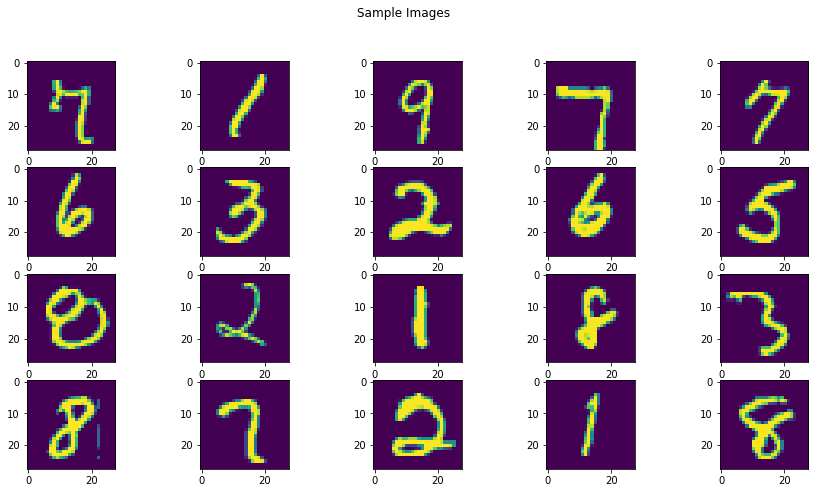

In [24]:
# Plotting a few observations
j=1
plt.figure(figsize=(15,7.5))
for i in np.arange(20):
  plt.suptitle('Sample Images')
  plt.subplot(4,5,j)
  plt.imshow(np.reshape(x[i],(28,28)))
  j=j+1

# Linear Discriminant Analysis

In [25]:
# Required packages
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [26]:
# Defining the linear discriminant model
lin_clf=LinearDiscriminantAnalysis()

In [27]:
# Fitting the given training data
lin_clf.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [46]:
y_tr_lda=lin_clf.predict(x) # Predicting the labels for the observations on the training set

In [36]:
y_pred_lda=lin_clf.predict(X_test) # Predicting the labels for the observations in the test set

In [49]:
print(f'The train accuracy of LDA model is:',metrics.accuracy_score(y,y_tr_lda))
print(f'The test accuracy  of LDA model is:',metrics.accuracy_score(y_test,y_pred_lda))

The train accuracy of LDA model is: 0.8696
The test accuracy  of LDA model is: 0.8722


# Quadratic Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [44]:
# Defining the Quadratic Driminant model
quad_clf=QuadraticDiscriminantAnalysis()

In [45]:
# Fitting the given training data
quad_clf.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [47]:
y_tr_qda=quad_clf.predict(x) # Predicting the labels for the observations on the training set

In [48]:
y_pred_qda=quad_clf.predict(X_test) # Predicting the labels for the observations in the test set

In [50]:
print(f'The train accuracy of QDA model is:',metrics.accuracy_score(y,y_tr_qda))
print(f'The test accuracy  of QDA model is:',metrics.accuracy_score(y_test,y_pred_qda))

The train accuracy of QDA model is: 0.56486
The test accuracy  of QDA model is: 0.5428


We notice that training and test accuracy has decreased in case of Quadratic Discriminative Analysis model than that was the case in Linear Discriminative Analysis model.<br>
This indicates that our assumption that the population distribution is multivariate normal is a quite valid assumption owing to the high test accuracy of LDA. However, the assumption that the variance and covariance differs for different classes might not be a correct assumption owing to the drop in test accuracy for QDA.

# Applying LDA and QDA using Principal Components

First we standardize the features

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x)
# Apply transform to both the training set
x_sc = scaler.transform(x)

# Fit on test set only.
scaler.fit(X_test)
# Apply transform to both the training set
x_test_sc = scaler.transform(X_test)

In [81]:
from sklearn.decomposition import PCA

There can be at most $\min (n-1,p)$ number of principal components that can be evaluated. Our target is to reduce the dimension of the feature space (which is currently p=784) also keeping in mind that the variability of the original features gets explained to the maximum possible degree.

In [132]:
pca=PCA(n_components=784)
p_comp=pca.fit_transform(x_sc)

We plot the cumulative proportion of variability explained by the principal components in decreasing order of the relative inportance of the said components.

We will work with that number of principal components that explain 90% of the total variability in our feature space.

In [129]:
k=len(np.cumsum(pca.explained_variance_ratio_)[np.cumsum(pca.explained_variance_ratio_)<=0.9])
k+1

234

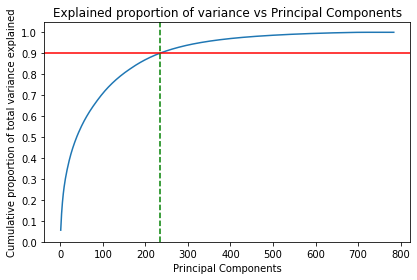

In [133]:
# Plotting the cumulative explained variability in feature space as a function of principal components in increasing importance
plt.plot(np.arange(1,784+1,1),np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.9,color='red')
plt.axvline(x=k+1,color='green',linestyle='--')      
plt.title('Explained proportion of variance vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative proportion of total variance explained')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()

Thus, we will be using the first 234 principal components as it explains 90% of the variability in our feature space.

In [138]:
pca=PCA(0.9)
p_comp=pca.fit_transform(x_sc)  # Transformed feature space containing first 234 principal components

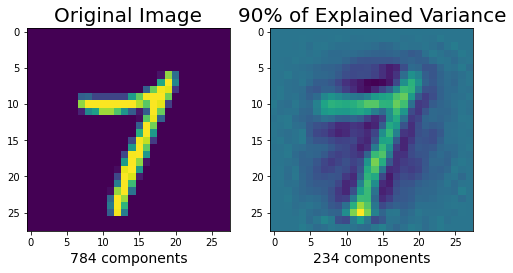

In [142]:
# We will plot the 'scaled' images as obtained from the original training data and the first 234 principal components

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x[45].reshape(28,28));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 234 principal components
plt.subplot(1, 2, 2);
plt.imshow(pca.inverse_transform(p_comp)[45].reshape(28, 28));
plt.xlabel('234 components', fontsize = 14)
plt.title('90% of Explained Variance', fontsize = 20);

Now we will try to fit the LDA and QDA models on this principal components.

In [143]:
lin_clf.fit(p_comp,y)  # Fitting the LDA model
quad_clf.fit(p_comp,y) # Fitting the QDA model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [156]:
# We fix the loadings in the direction of the training data feature space principal components
pca=PCA(n_components=234)
p_comp=pca.fit(x_sc)

In [157]:
x_test_pc=pca.transform(x_test_sc)   # Evaluating the first 234 principal components of test feature space

In [158]:
y_pc_lda_test=lin_clf.predict(x_test_pc)    # Predicting the labels of test data set using LDA model
y_pc_qda_test=quad_clf.predict(x_test_pc)   # Predicting the labels of test data set using QDA model

In [159]:
print(f'The test accuracy of LDA using first 234 principal components is', metrics.accuracy_score(y_test,y_pc_lda_test))
print(f'The test accuracy of QDA using first 234 principal components is', metrics.accuracy_score(y_test,y_pc_qda_test))

The test accuracy of LDA using first 234 principal components is 0.8722
The test accuracy of QDA using first 234 principal components is 0.1363


Evidently LDA performs as well as the model defined by first 234 principal components and QDA does not perform well when the principal components are used.<br><br> This further is an indication that the assumption that the data might be inherently *linearly separable* must not be far from truth.

# Now we will try predicting the labels of rotated MNIST dataset.

In [56]:
x_rot_test = loadmat(os.path.join(root, 'mnist-rot_test_data'))['test_data']
y_rot_test = loadmat(os.path.join(root, 'mnist-rot_test_label'))['test_label']

In [70]:
x_rot_test=x_rot_test.reshape((10000,784))

In [77]:
y_rot_test=y_rot_test.reshape((10000,1))

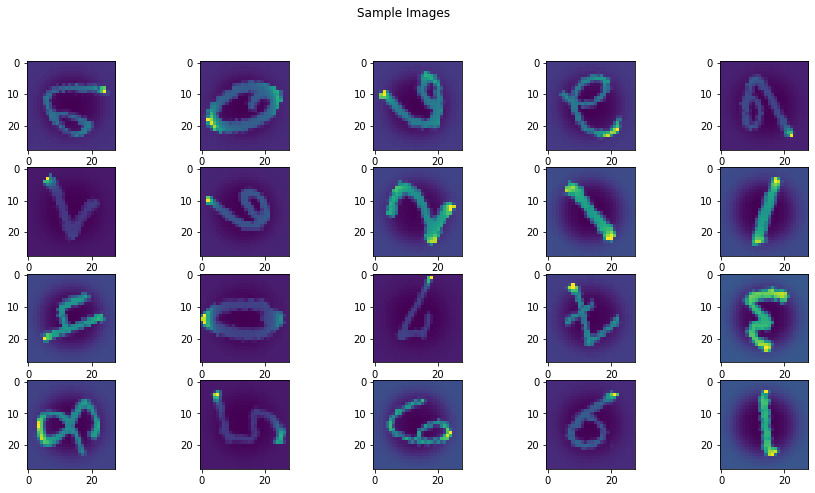

In [71]:
# Plotting a few rotated observations
j=1
plt.figure(figsize=(15,7.5))
for i in np.arange(20):
  plt.suptitle('Sample Images')
  plt.subplot(4,5,j)
  plt.imshow(x_rot_test[i].reshape((28,28)))
  j=j+1

In [73]:
y_rot_lda=lin_clf.predict(x_rot_test)  # Prediction using LDA model
y_rot_qda=quad_clf.predict(x_rot_test)  # Prediction using QDA model

In [78]:
print(f'The train accuracy of LDA model on rotated dataset is:',metrics.accuracy_score(y_rot_test,lin_clf.predict(x_rot_test)))
print(f'The test accuracy  of QDA model on rotated dataset is:',metrics.accuracy_score(y_rot_test,quad_clf.predict(x_rot_test)))

The train accuracy of LDA model on rotated dataset is: 0.0939
The test accuracy  of QDA model on rotated dataset is: 0.0997


The drastic loss in accuracy indicates the fact that both LDA and QDA works better when the training and test observations are similar in type.<br> In this case, we can get an understanding that a new model might be required to account into the cases of rotated labels.